### trying to do animation

In [1]:

import agentpy as ap
import numpy as np
import random as random
import networkx as nx
import IPython
import matplotlib.pyplot as plt
import seaborn as sns
from TAG import *
from Agents import *
from Models import *

In [12]:

parameters = {
    'seed':52,
    'steps': 50, #number of time periods
    'agent_n': 30,
    'phi':2.5,#ap.Values(2.0,2.5,3.0,3.5), # #multiplier for common contributions
    'graph_m' : 4,
    'graph_alpha': 0,# ap.Values(0.01,0.1,0.25,0.5, 0.75,1.0),
    'graph_p':0.3,#ap.Values(0.1,0.2,0.3,0.4,0.5),
    'power_p': 0,#ap.Values(0.1, 0.2,0.3,0.4,0.5),#ap.Values(0.01,0.2,0.4,0.6,0.8),
    'gtype': 'BA', #ap.Values('WS', 'TAG', 'BA', 'RRG'),
    'atype': ReplicatorLocal,
    'replicator_alpha': 1.0, #1 is pure replicator, 0 is imitation
    'plot_G': 1, #gives the summary plot of the graph for each experiment
    'extended_reporting': 1
}
model = WealthModel(parameters)

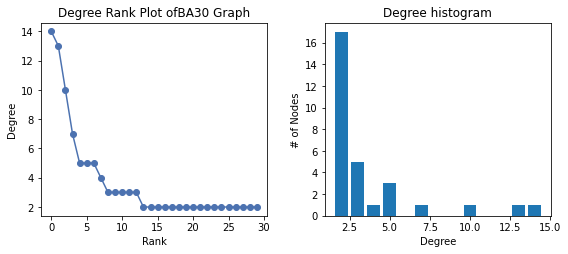

Completed: 50 steps
Run time: 0:00:00.556216
Simulation finished


In [13]:
results = model.run()


In [16]:
def stackplot(results, ax):
    defect = results.contribute[results.contribute==0].groupby('t').count()
    con = results.contribute[results.contribute==1].groupby('t').count()
    x = con.index
    #y = [defect, con]
    y1 = [0 for i in x]
    for z in defect.index:
        y1[z] = defect[z]

    sns.set()
    #fig, ax = plt.subplots()
    ax.stackplot(x,y1, con, labels = ['defect', 'con'], colors = ['r', 'g'])
    ax.set_xlim(0, max(1, len(x)-1))
    ax.set_ylim(0, y1[0] + con[0])
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of Agents')
    #fig.suptitle('Stackplot')

    
def animation_plot(m, axs):
    ax1, ax2 = axs
    ax1.set_title('Stackplot')
    #prop = 
    ax2.set_title('Graph Contributing')
    stackplot(m.output.variables.ReplicatorLocal, ax1)
    
    color_dict = {0: 'r', 1: 'g'}
    #print(m.agents.contribute)
    colors = [color_dict[c] for c in m.agents.contribute]
    #print(m.network.graph)
    nx.draw_circular(m.network.graph, node_color = colors, node_size = 150, ax = ax2)

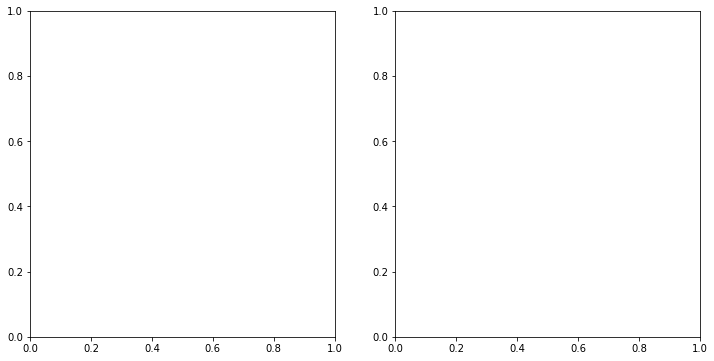

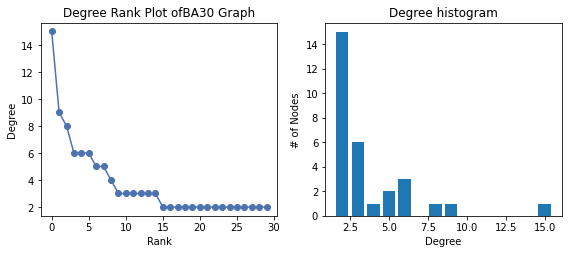

In [17]:
fig, axs = plt.subplots(1,2,figsize = (12,6))
animation = ap.animate(WealthModel(parameters), fig, axs, animation_plot, interval = 800)

In [18]:
IPython.display.HTML(animation.to_jshtml())